# Assessing Feature Importance and Feature Selection

Unlike what the big data fools would have you believe more isn't better. Because of dimensionality more features can make separability harder, all while wasting more of your computing time. I don't know how good of a method this is but it look to be a pretty good way of showing how much each feature is used for the making of the final model.

We will first try to estimate the importance of particular features using my _EstimateFeatureImportance_ class and then we will try to select the least number of features that gives the most accurate predictions using my _SBFS_ class.

In [1]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as graph
import seaborn as sns

%matplotlib inline

from Statistics.AssessingFeatureImportance import EstimateFeatureImportance

sns.set()

## Iris Dataset
A low dimensional example

1) sepal length (cm) = 44.4%
2) sepal width (cm) = 43.5%
3) petal length (cm) = 9.8%
4) petal width (cm) = 2.3%


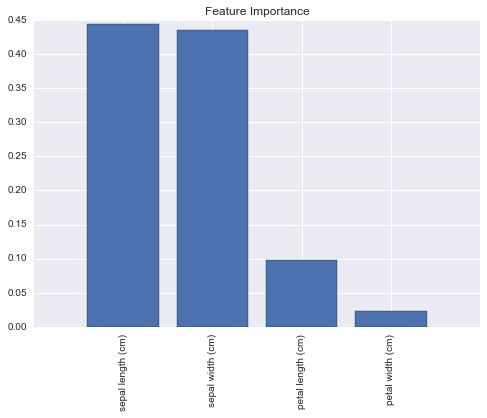

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
x_iris = iris.data
y_iris = iris.target

# Run Feature Importance
iris_feature_importance = EstimateFeatureImportance(x_iris, y_iris, iris.feature_names)
iris_feature_importance.graph_importance()

## Breast Cancer Dataset
A high dimensional example

1) mean radius = 12.8%
2) mean texture = 12.1%
3) mean perimeter = 11.799999999999999%
4) mean area = 11.1%
5) mean smoothness = 10.100000000000001%
6) mean compactness = 5.0%
7) mean concavity = 4.9%
8) mean concave points = 4.8%
9) mean symmetry = 4.0%
10) mean fractal dimension = 3.4000000000000004%
11) radius error = 3.4000000000000004%
12) texture error = 1.9%
13) perimeter error = 1.6%
14) area error = 1.5%
15) smoothness error = 1.4000000000000001%
16) compactness error = 1.3%
17) concavity error = 1.3%
18) concave points error = 1.0999999999999999%
19) symmetry error = 1.0%
20) fractal dimension error = 0.7000000000000001%
21) worst radius = 0.7000000000000001%
22) worst texture = 0.6%
23) worst perimeter = 0.5%
24) worst area = 0.5%
25) worst smoothness = 0.4%
26) worst compactness = 0.4%
27) worst concavity = 0.4%
28) worst concave points = 0.4%
29) worst symmetry = 0.4%
30) worst fractal dimension = 0.4%


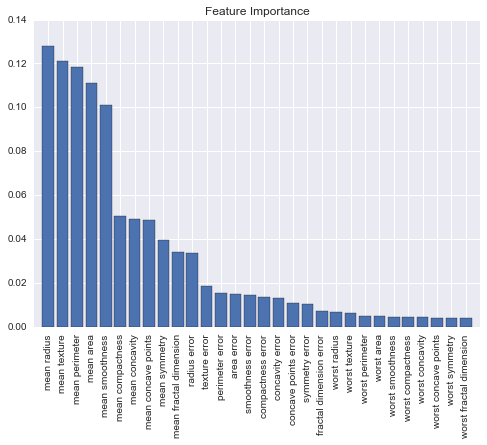

In [3]:
from sklearn.datasets import load_breast_cancer

boobs = load_breast_cancer()
x_boobs = boobs.data
y_boobs = boobs.target

boob_feature_importance = EstimateFeatureImportance(x_boobs, y_boobs, boobs.feature_names)
boob_feature_importance.graph_importance()

# SBFS 
__Sequential Backwards Feature Selection__

I'm going to use a dumb supervised classifier (kNN) to show what my algorithm can do. It's capable of taking any scikit-learn classifier as an input and was designed to mimic the way data is inputed and fitted in typical scikit-learn classes.

Since this algorithm will brute force all the possible combinations the processing time is a function of the number of features and the classifier's performance.

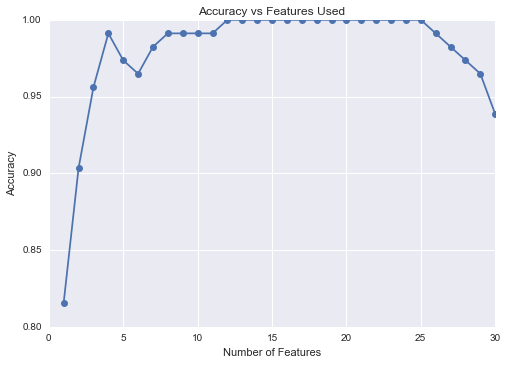

In [2]:
from Statistics.SequentialBackwardsFeatureSelection import SBFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# Again load the Breast Cancer Dataset
data = load_breast_cancer()

# Feature Selector
classifier = KNeighborsClassifier(n_neighbors=2)
sbfs = SBFS(classifier, k_features=1)
sbfs.fit(
    StandardScaler().fit_transform(data.data),
    data.target
)

# Show Performance
sbfs.graph_performance()

Notice that is only _12_ of the features were requested to obtain 100% accuracy on the training data and using more than _25_ features resulted in a drop in accuracy on this dataset.

# Conclusion 

I doubt this is a novel method but it is a great way I think of looking all the important features for classifcation.